In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [2]:
df = pd.read_csv(r'C:\Users\milan\Desktop\ML\Support_vector_regression\Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x = df.iloc[ : , 1].values
y = df.iloc[ : , -1].values

In [4]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [5]:
obj = PolynomialFeatures(degree = 5)
poly_x = obj.fit_transform(x)
poly_y = y

In [6]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [7]:
x =  sc_x.fit_transform(x)
y  = sc_y.fit_transform(y)

In [8]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [17]:
reg = SVR(kernel = 'rbf')

In [18]:
reg.fit(x,y)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [19]:
reg.score(x,y)

0.7516001070620798

In [12]:
#using the inverse_transform we can get the original value
pred_val = sc_y.inverse_transform(reg.predict(sc_x.transform([[6.5]])).reshape(-1,1))
print(round(pred_val[0][0]))

170370


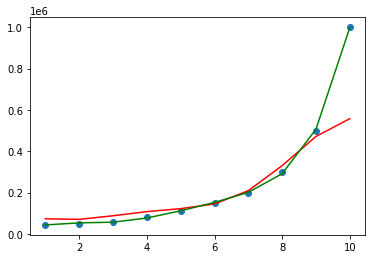

In [23]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y))
plt.plot(sc_x.inverse_transform(x), 
         sc_y.inverse_transform(reg.predict(x).reshape(-1,1)), 
         color = 'r')
plt.plot(sc_x.inverse_transform(x), reg_poly.predict(poly_x), color = 'g')

plt.show()

In [21]:
reg_poly = LinearRegression()
reg_poly.fit(poly_x,poly_y)

LinearRegression()

In [22]:
reg_poly.predict(poly_x)

array([[ 43895.10489603],
       [ 53836.82983718],
       [ 57065.26806579],
       [ 77286.71328745],
       [112263.40326412],
       [152736.59673702],
       [201349.65034962],
       [291571.09557056],
       [506617.71561662],
       [998377.62237564]])